In [ ]:
# Connect google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
main_datasets_path = '/content/drive/MyDrive/Colab Notebooks/LSMA/Homework 1/'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize


# 1) Exploratory Data Analysis  

Firstly, we aim to print the data from the initial 1000 rows to downsize the database.

In [ ]:
local_spotify_file = main_datasets_path+'SpotifyDataset.csv'

spotify_df = pd.read_csv(local_spotify_file, index_col = 0, nrows=1000, thousands  = ',').T

df_summary = spotify_df.describe()
df_summary

artist_name,YG,YG,R3HAB,Chris Cooq,Chris Cooq,Curbo,Bingo Play,G Herbo,34 Feet,Chris Cooq,...,Los Relámpagos,Los Relámpagos,Smoke Trees,IamG,Los Cadetes De Linares,Los Cadetes De Linares,Los Cadetes De Linares,Los Cadetes De Linares,Los Cadetes De Linares,Los Cadetes De Linares
count,16,16.0,16.0,16,16,16,16,16.0,16,16,...,16,16,16,16.0,16,16.0,16,16,16,16
unique,15,15.0,15.0,15,16,15,14,15.0,16,16,...,16,16,16,15.0,16,15.0,16,16,16,15
top,1,0.0,0.0,0,2jbYvQCyPgX3CdmAzeVeuS,0,4,0.0,7BQaRTHk44DkMhIVNcXy2D,049RxG2laEl9U1PGYeIqLV,...,4c2poVmqnkCcdtoGGIPgjx,6pLD4evJViz0IwAwo3gNCp,009Mof2o4aS1P2l3FbaEpa,0.0,1GZ28zMe9jTSBEbSRX90oj,0.0,3kF0rSCaNpwqZg86eRLpSx,1mSuG6obUBCv2545UMDtbS,7py73EIEoRQwGKKelWZd3a,3
freq,2,2.0,2.0,2,1,2,2,2.0,1,1,...,1,1,1,2.0,1,2.0,1,1,1,2


###### 8 rows × 207 columns  

We can access individual summaries by printing only the data related to piano artists, for instance.


In [ ]:
df_summary[['Johann Sebastian Bach','Wolfgang Amadeus Mozart','Ludwig van Beethoven','Frédéric Chopin']]

artist_name,Johann Sebastian Bach,Johann Sebastian Bach,Johann Sebastian Bach,Johann Sebastian Bach,Johann Sebastian Bach,Johann Sebastian Bach,Johann Sebastian Bach,Johann Sebastian Bach,Johann Sebastian Bach,Johann Sebastian Bach,...,Frédéric Chopin,Frédéric Chopin,Frédéric Chopin,Frédéric Chopin,Frédéric Chopin,Frédéric Chopin,Frédéric Chopin,Frédéric Chopin,Frédéric Chopin,Frédéric Chopin
count,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
unique,14,16,16,15,16,16,15,15,15,16,...,15,15,15,16,15,16,16,16,16,16
top,0,3no75FW83pP3d0I1sXrukX,0ljS5bnVCLPWzROZLs70ku,0,6mgvKiJOqXBA5roS0uYNjC,1ZkwQEl62yURJ5LAFZAK3f,4,5,0,2p1mXjFvbSh35A9CaSMqUa,...,1,1,3,0aJDvIeUkceMRueD84rRDR,4,4bVF5VAZfpkvLEbwB1fzln,3LdDWNrBocUClatUryFv91,1yj2Nen7t6IwuVAhNW9WVr,6QPd4woNJ180leJb0aK0CX,2N0fucXCh5ByBzyg8eiY64
freq,3,1,1,2,1,1,2,2,2,1,...,2,2,2,1,2,1,1,1,1,1


We can obtain the titles and their corresponding danceability scores using the groupby operation.

In [ ]:
# Read the CSV file using pandas
spotify_df = pd.read_csv(local_spotify_file, thousands=',')

# Calculate the mean of danceability for each artist
popularity_by_track = spotify_df.groupby('track_name')['popularity'].mean()

# Display the danceability for each artist
print("Popularity for each track:")
print(popularity_by_track)


Popularity for each track:
track_name
!!!!                                   25.0
!!!!!!!                                33.0
"1955                                   0.0
"42" - From SR3MM                      53.0
"99"                                   69.0
                                       ... 
환상통 Only One You Need                  46.0
후유증 Falling Blossoms                   42.0
후유증 Falling Blossoms - Instrumental    18.0
휴일 Lazy                                47.0
흰 Whiteness                             9.0
Name: popularity, Length: 108890, dtype: float64


From there, we can identify the most popular title, which corresponds to finding the highest value score.


In [ ]:
popularity_by_track.idxmax()
print("The most danceable title is:")
print(popularity_by_track.idxmax())
print("With a value score of:")
print(popularity_by_track.max())

The most danceable title is:
Con Calma
With a value score of:
100.0


Conclusion: "Con Calma" is the most danceable title, with a value score of 100.0.

## Plotting  

With this data, it's more convenient to visualize using a histogram. For this, I would like to focus on specific features ('energy', 'instrumentalness', 'danceability', 'speechiness') that will assist me throughout my analysis.

array([[<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'speechiness'}>]], dtype=object)

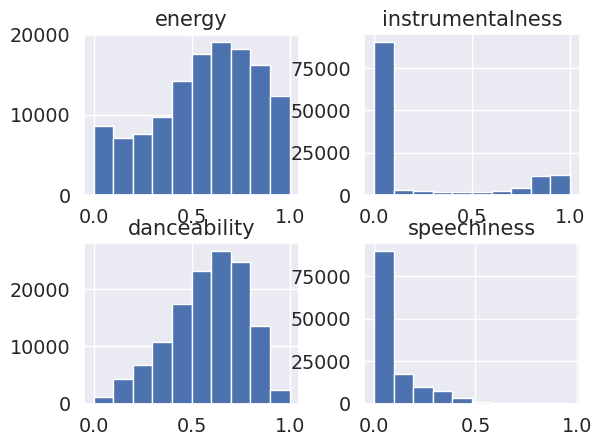

In [ ]:
spotify_df[['energy', 'instrumentalness', 'danceability','speechiness']].hist()

From those diagrams, no definitive conclusions can be drawn at this stage. However, it's noticeable that danceability appears to have similarities with energy, while speechiness shows similarities with instrumentalness. This suggests that danceability and energy may be related, as well as speechiness and instrumentalness.

This leads us to ask: what is the correlation between those features ? And what is the correlation between thoses features and popularity? What attributes contribute to a song's likeness?



To answer this question, we will first plot the correlation matrix.

<ipython-input-28-81dde20116d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = spotify_df.corr()


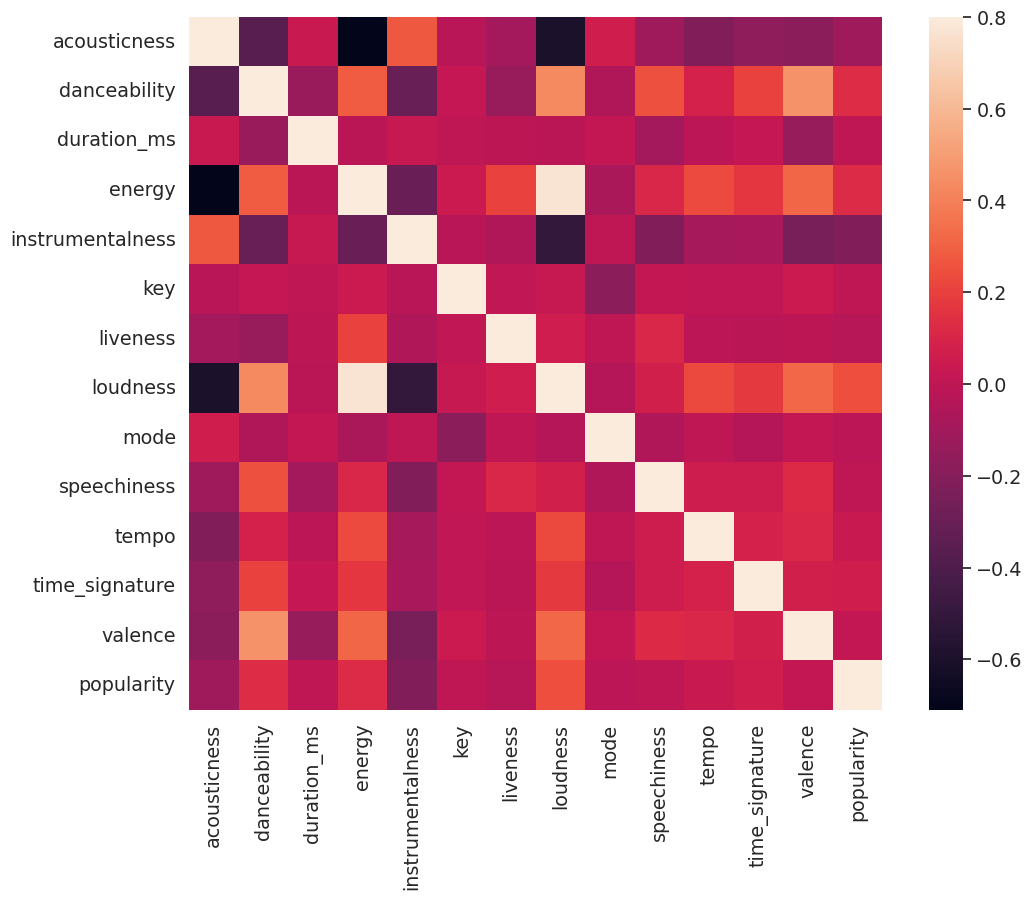

In [ ]:
# Correlation Matrix Heatmap
corrmat = spotify_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

There is an abundance of data to analyze, but we can narrow our focus by printing some correlations between the data we have already observed.

Let's examine which features contribute the most to the popularity of a song. In addition to the existing features, we'll include the loudness feature for this analysis.

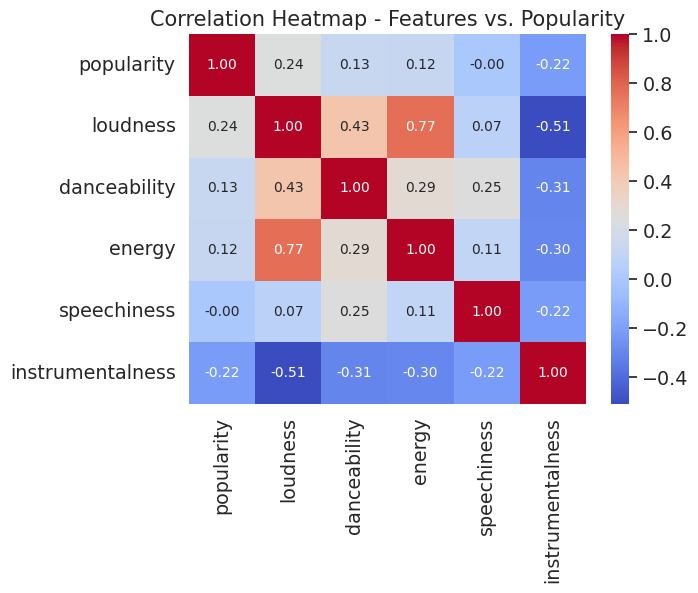

In [ ]:
# Selecting the features to include in the correlation matrix (including popularity)
selected_features = ['popularity', 'loudness', 'danceability', 'energy','speechiness', 'instrumentalness']

# Calcul de la matrice de corrélation
corr_matrix = spotify_df[selected_features].corr()

# Calculating the correlation matrix
corr_matrix = spotify_df[selected_features].corr()

# Creating the heatmap
sns.set(font_scale=1.25)
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap - Features vs. Popularity')
plt.show()

From these correlation results, we can conclude that the louder (correlation coefficient of 0.24), more danceable (0.13), and more energetic (0.12) a song is, the higher its likelihood of becoming popular. Surprisingly, the instrumentalness (-0.22) of a song appears to have a negative influence on its popularity. Given that instrumentalness represents the presence of instruments in a song, it leads us to conclude that the more instruments are used in a song, the less popular it becomes.

Additionally, we observe a strong correlation between danceability and loudness (0.43), as well as between energy and loudness (0.77). This suggests that if a song is danceable, it tends to be loud, and similarly, if a song is energetic, it also tends to be loud.

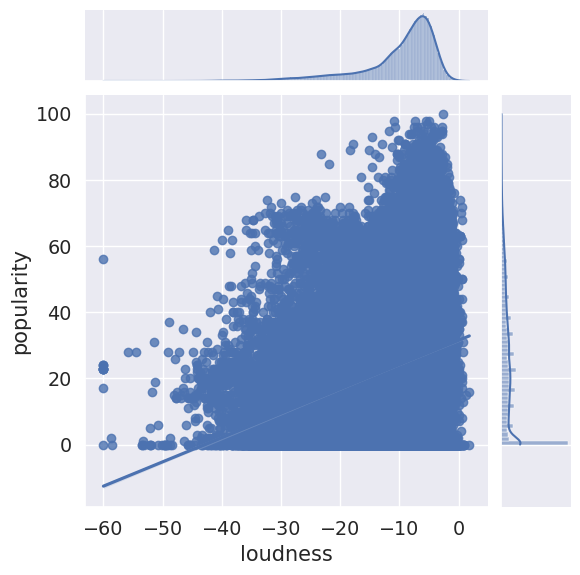

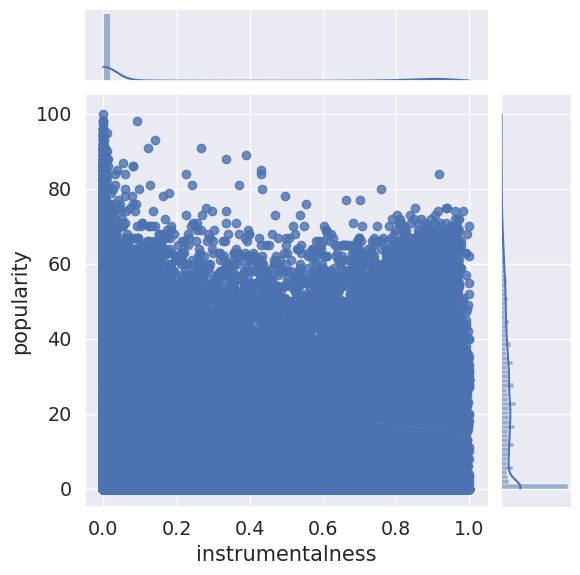

In [ ]:
# Popularity vs Loudness
sns.jointplot(x=spotify_df['loudness'], y=spotify_df['popularity'], kind='reg')

#Popularity vs Instrumentalness
sns.jointplot(x=spotify_df['instrumentalness'], y=spotify_df['popularity'], kind='reg')

We can confirm what we initially observed on the correlation heatmap:

*   The loudness of a song tends to make it more popular.
*   The Instrumentalness of a song tends to make it less popular.



We may also wonder: who is the most popular artist?

In [ ]:
# Calculate the average popularity score for each artist
average_popularity_by_artist = spotify_df.groupby('artist_name')['popularity'].mean()

# Find the artist with the highest average popularity
most_popular_artist = average_popularity_by_artist.idxmax()
highest_average_popularity = average_popularity_by_artist.max()

# Display the most popular artist and their average popularity score
print("Most Popular Artist:", most_popular_artist)
print("Average Popularity Score:", highest_average_popularity)


Most Popular Artist: Jonas Brothers
Average Popularity Score: 91.0


Does popularity depend on the number of tracks released by an artist?

In [ ]:
# Group the data by artist_name and count the number of tracks for each artist
tracks_count_by_artist = spotify_df.groupby('artist_name').size()

# Calculate the correlation between the number of tracks and popularity
correlation = tracks_count_by_artist.corr(spotify_df.groupby('artist_name')['popularity'].mean())

# Display the correlation coefficient
print("Correlation between Number of Tracks and Popularity:", correlation)


Correlation between Number of Tracks and Popularity: 0.013961190254656893


This correlation results (0.014) suggests that there is almost no linear relationship between the number of tracks and the popularity of an artist.

Since there is no correlation between the number of tracks and the popularity of an artist, we may conclude that an artist does not become popular by making a lot of songs.

For this last task, let's print the top artists with the most songs on Spotify. These data will be useful later on.

In [ ]:
# Calculate the number of tracks for each artist
tracks_count_by_artist = spotify_df['artist_name'].value_counts()

# Sort the artists based on the number of tracks they have
artist_ranking = tracks_count_by_artist.sort_values(ascending=False)

# Display the top artists with the most tracks
print("Ranking of Artists by Number of Tracks:")
print(artist_ranking.head(10))  # Displaying the top 50 artists
# Display the top artists with the less tracks


Ranking of Artists by Number of Tracks:
Johann Sebastian Bach      3621
Wolfgang Amadeus Mozart    1755
Armin van Buuren           1124
Ludwig van Beethoven        928
Frédéric Chopin             614
Claude Debussy              451
Image Sounds                369
Waka Flocka Flame           273
Los Cadetes De Linares      266
Antonio Vivaldi             254
Name: artist_name, dtype: int64


We can observe that the artists with the most songs on Spotify are predominantly piano artists and classical artists, indicating that the classical genre is the most represented on the platform.

# 2) Dimensionality Reduction and Clustering for Exploratory Data Analysis



To initiate a thorough PCA analysis, it's crucial to identify the artists that produce songs with distinct characteristics to localize clusters effectively.

In [ ]:
# Extract features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
            'loudness', 'speechiness', 'tempo', 'valence']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(spotify_df[features])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
spotify_df['cluster'] = kmeans.fit_predict(scaled_features)

# Identify different clusters
unique_clusters = spotify_df['cluster'].unique()

# Select artists from different clusters
artists_with_different_characteristics = []
for cluster_id in unique_clusters:
    cluster_artists = spotify_df[spotify_df['cluster'] == cluster_id]['artist_name'].unique()
    artists_with_different_characteristics.append(cluster_artists[0])  # Select the first artist from each cluster

# Print selected artists
print("Artists with very different characteristics:")
for artist in artists_with_different_characteristics:
    print(artist)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Artists with very different characteristics:
YG
R3HAB
Burbank


In [ ]:
# Charger les données Spotify
spotify_data = pd.read_csv(main_datasets_path+'SpotifyDataset.csv')


We select the features that appear pertinent for analysis.

In [ ]:
# Sélectionner les variables pertinentes
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
            'loudness', 'speechiness', 'tempo', 'valence']

# Séparer les caractéristiques des étiquettes (si vous en avez)
X = spotify_data[features]
X

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.005820,0.743,0.339,0.000,0.0812,-7.678,0.4090,203.927,0.1180
1,0.024400,0.846,0.557,0.000,0.2860,-7.259,0.4570,159.009,0.3710
2,0.025000,0.603,0.723,0.000,0.0824,-5.890,0.0454,114.966,0.3820
3,0.029400,0.800,0.579,0.912,0.0994,-12.118,0.0701,123.003,0.6410
4,0.000035,0.783,0.792,0.878,0.0332,-10.277,0.0661,120.047,0.9280
...,...,...,...,...,...,...,...,...,...
130658,0.006780,0.601,0.801,0.000,0.0991,-5.174,0.0323,131.049,0.2890
130659,0.918000,0.387,0.249,0.000,0.1030,-13.233,0.0437,94.039,0.3460
130660,0.330000,0.717,0.532,0.000,0.0997,-8.351,0.2060,156.977,0.5460
130661,0.007900,0.772,0.510,0.000,0.1310,-9.670,0.1200,120.049,0.0755


Since the database is extensive, we can reduce it by selecting only piano artists.

In [ ]:
# Sélectionner les artistes sur lesquels vous voulez appliquer l'analyse PCA
selected_artists = ['YG', 'R3HAB', 'Burbank']

# Filter the DataFrame to include only the data of the selected artists
selected_data = spotify_data[spotify_data['artist_name'].isin(selected_artists)]
selected_data


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
45,Burbank,7AgDITo8BVDoh2bXj2psYA,Waiting for U,0.83200,0.699,168000,0.309,0.171000,4,0.1160,-10.790,1,0.1590,79.991,4,0.4220,31
1205,R3HAB,3N0Q5ce0Q3v6MmcNwaGG2p,Ain't That Why - 22 Bullets Remix,0.00724,0.605,182400,0.920,0.000000,6,0.0708,-2.268,0,0.0497,149.945,4,0.6350,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129642,R3HAB,2rOU98Cy13yvifhme0Ovn5,Rumors - R3HAB & Skytech vs. Marvelus Fame Remix,0.01450,0.550,142800,0.900,0.000000,10,0.3220,-4.327,0,0.2250,150.049,4,0.4310,63
129932,R3HAB,5KqQMnwkwKWjMNa3WreSCW,Hyperspace,0.01490,0.392,182285,0.920,0.577000,0,0.0457,-4.625,1,0.3160,104.358,3,0.0349,55
130019,R3HAB,0d4BSTFK5qm9hsnB09axYR,Hold On Tight - Owen Norton Remix,0.02300,0.457,194639,0.944,0.000044,5,0.1220,-3.338,1,0.0671,126.616,3,0.3660,68
130349,R3HAB,3roMGtDfleE2N8M56E2WFs,We Do (feat. Miranda Glory),0.24100,0.377,136700,0.557,0.000000,10,0.1050,-5.629,0,0.1020,69.660,4,0.3060,53


By reducing the database at the top 5 artists that

We apply the PCA transformation to this data.

In [ ]:
# Extract the features on which we will apply PCA
X = selected_data.drop(['artist_name', 'track_id', 'track_name'], axis=1)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['artist_name'] = selected_data['artist_name']
pca_df
print(pca.explained_variance_ratio_)

[9.99999316e-01 4.40321083e-07]


We observe that the first principal component already explains almost 99.9% of the variance, while the second one accounts for very little variance.



Then we plot the graph

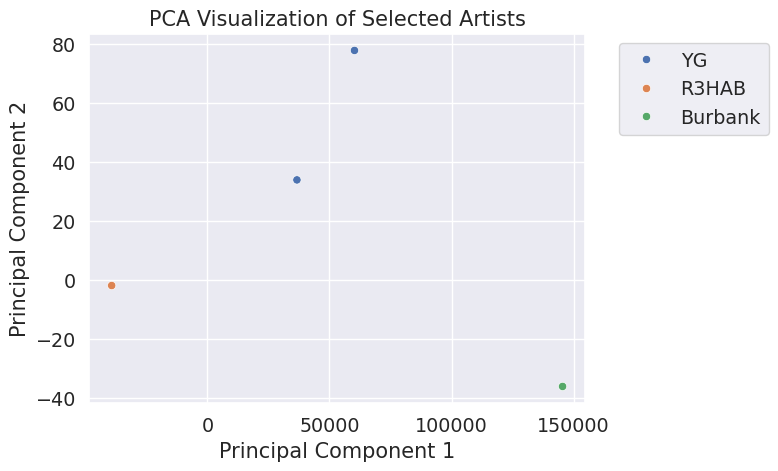

In [ ]:
# Visualize the PCA data
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='artist_name')
plt.title('PCA Visualization of Selected Artists')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As anticipated, by selecting artists that produce songs with very different characteristics, we can observe the formation of three distinct clusters.

In [ ]:
columns_to_drop = ['artist_name', 'track_id', 'track_name']  # Liste des colonnes à supprimer
numeric_data = spotify_df.drop(columns_to_drop, axis=1)

# Appliquer KMeans uniquement sur les caractéristiques numériques
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(numeric_data)
spotify_df['cluster'] = pd.Series(clusters.labels_, index=spotify_df.index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(len(clusters.labels_))

# Vérifier la taille de pca_df
print(len(pca_df))


130663
84


## 3. Model Training and Evaluation

It seems that my PC is unable to execute this portion of the code, and the reason for this issue is unclear.

## 4. Explainable AI (XAI)
